In [1]:
!pip install tensorflow

In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
async-generator              1.10
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
exceptiongroup               1.1.1
executing                    1.2.0
filelock                     3.12.0
flatbuffers                  23.5.26
fonttools                    4.39.4
gast                         0.4.0
google-auth                  2.19.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.54.2
h11 

In [3]:
import tensorflow as tf
import os

In [4]:
!pip install opencv-python

In [5]:
import cv2
import imghdr

C:\Users\user\AppData\Local\Temp\ipykernel_19188\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir=os.path.join('dataset')

In [7]:
os.listdir(data_dir)

['aircon',
 'hair_dryer',
 'kulkas',
 'lampu',
 'laptop',
 'mesin_cuci',
 'oven',
 'rice_cooker',
 'setrika',
 'tivi',
 'vacuum']

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread(os.path.join(data_dir, 'kulkas','kulkas (1).jpg'))

In [10]:
img.shape

#D:\kuliah\bangkit\tugas\capstone\Jupyter\Dataset\Datasets\training\aircon

(640, 640, 3)

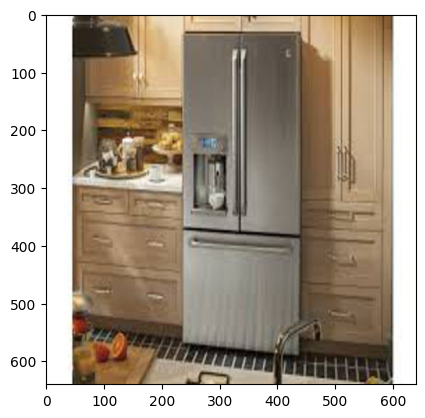

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
os.listdir(os.path.join(data_dir,'vacuum'))

['vacuum_0.jpeg',
 'vacuum_1.jpg',
 'vacuum_10.jpg',
 'vacuum_100.jpg',
 'vacuum_101.jpg',
 'vacuum_102.jpg',
 'vacuum_103.jpeg',
 'vacuum_104.jpg',
 'vacuum_105.jpg',
 'vacuum_106.jpg',
 'vacuum_107.jpg',
 'vacuum_108.jpg',
 'vacuum_109.jpg',
 'vacuum_11.jpg',
 'vacuum_110.jpg',
 'vacuum_111.JPG',
 'vacuum_112.jpg',
 'vacuum_113.jpg',
 'vacuum_114.jpeg',
 'vacuum_115.jpg',
 'vacuum_116.jpg',
 'vacuum_117.jpeg',
 'vacuum_118.jpg',
 'vacuum_119.jpg',
 'vacuum_12.jpg',
 'vacuum_120.jpg',
 'vacuum_121.jpg',
 'vacuum_122.jpg',
 'vacuum_123.jpg',
 'vacuum_124.jpg',
 'vacuum_125.jpg',
 'vacuum_126.jpg',
 'vacuum_127.jpg',
 'vacuum_128.jpg',
 'vacuum_129.jpg',
 'vacuum_13.jpg',
 'vacuum_130.jpeg',
 'vacuum_131.jpg',
 'vacuum_132.jpg',
 'vacuum_133.jpg',
 'vacuum_134.jpg',
 'vacuum_135.jpg',
 'vacuum_136.png',
 'vacuum_137.jpg',
 'vacuum_138.jpg',
 'vacuum_139.jpg',
 'vacuum_14.jpg',
 'vacuum_140.jpg',
 'vacuum_141.jpg',
 'vacuum_142.jpg',
 'vacuum_143.jpeg',
 'vacuum_144.jpg',
 'vacuum_145.jp

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

aircon_0.jpeg
aircon_1.jpg
aircon_10.jpg
aircon_100.jpg
aircon_101.jpg
aircon_102.jpeg
aircon_103.jpg
aircon_104.jpg
aircon_105.jpg
aircon_106.jpg
aircon_107.jpg
aircon_108.jpg
aircon_109.jpg
aircon_11.jpg
aircon_110.jpg
aircon_111.jpg
aircon_112.jpg
aircon_113.jpg
aircon_114.jpeg
aircon_115.jpg
aircon_116.jpg
aircon_117.jpg
aircon_118.jpg
aircon_119.jpg
aircon_12.jpg
aircon_120.jpg
aircon_121.jpg
aircon_122.jpg
aircon_123.jpg
aircon_124.jpg
aircon_125.jpg
aircon_126.jpeg
aircon_127.jpg
aircon_128.png
aircon_129.jpeg
aircon_13.jpg
aircon_130.jpg
aircon_131.jpg
aircon_132.jpg
aircon_133.jpg
aircon_134.jpg
aircon_135.jpg
aircon_136.jpg
aircon_137.jpg
aircon_138.jpg
aircon_139.jpg
aircon_14.jpg
aircon_140.jpg
aircon_141.jpeg
aircon_142.jpg
aircon_143.jpg
aircon_144.jpg
aircon_145.jpg
aircon_146.jpg
aircon_147.jpg
aircon_148.jpg
aircon_149.jpg
aircon_15.jpg
aircon_150.jpg
aircon_151.jpg
aircon_152.jpg
aircon_153.jpeg
aircon_154.jpg
aircon_155.jpg
aircon_156.jpg
aircon_157.jpg
aircon_158.jp

In [14]:
for image_class in os.listdir(data_dir):
    print(f'total training {image_class} images:' , len(os.listdir(os.path.join(data_dir,image_class))))

total training aircon images: 1000
total training hair_dryer images: 1000
total training kulkas images: 1000
total training lampu images: 1000
total training laptop images: 1000
total training mesin_cuci images: 1000
total training oven images: 1000
total training rice_cooker images: 1000
total training setrika images: 1000
total training tivi images: 1000
total training vacuum images: 1000


In [15]:
batch_size = 16
img_height = 224
img_width = 224

In [16]:
# import splitfolders

# splitfolders.ratio('dataset', output="split", seed=1337, ratio=(.8, 0.2))

In [17]:
val_path = 'split/val'
train_path = 'split/train'

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11000 files belonging to 11 classes.
Using 8800 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11000 files belonging to 11 classes.
Using 2200 files for validation.


In [20]:
class_names = train_ds.class_names
print(class_names)

['aircon', 'hair_dryer', 'kulkas', 'lampu', 'laptop', 'mesin_cuci', 'oven', 'rice_cooker', 'setrika', 'tivi', 'vacuum']


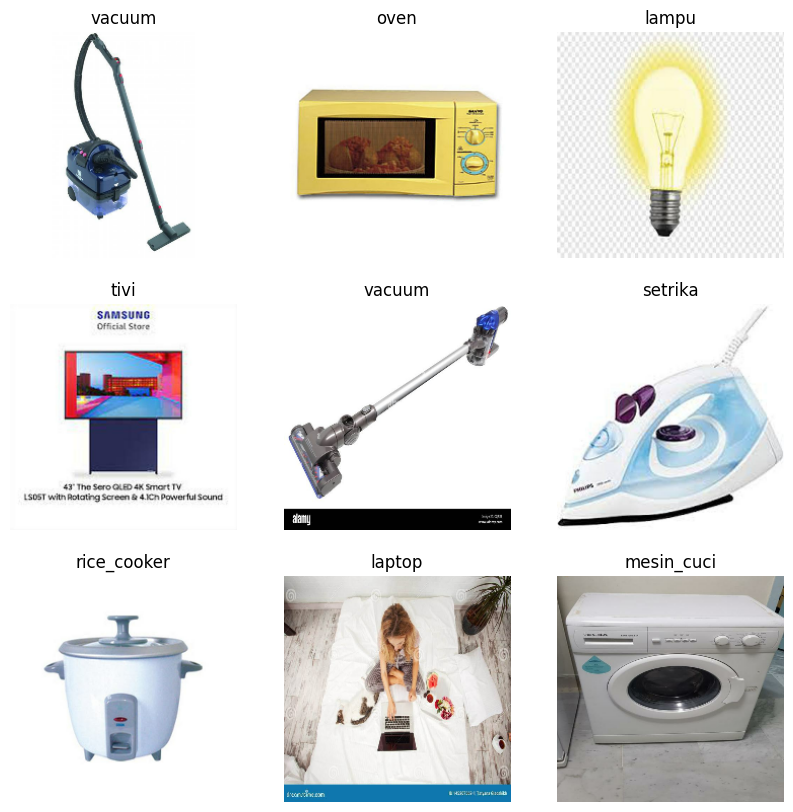

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [42]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [43]:
from tensorflow.keras import regularizers

In [44]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  # tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= (img_height, img_width, 3),
                        kernel_initializer= 'he_normal'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
  tf.keras.layers.Conv2D(48, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(48, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),  
  tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [45]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 16)        5824      
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 18, 48)        6960      
                                                                 
 dropout_5 (Dropout)         (None, 18, 18, 48)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 18, 18, 48)        20784     
                                                      

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,)


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'split/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = val_datagen.flow_from_directory(
        'split/val',
        target_size=(img_height, img_width),
        batch_size=batch_size, shuffle=False)

Found 8800 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.


In [49]:
epochs=50
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  # callbacks=[early_stopping]
)

Epoch 1/50
550/550 [==============================] - 172s 309ms/step - loss: 2.7417 - accuracy: 0.3281 - val_loss: 1.8530 - val_accuracy: 0.4959
Epoch 2/50
550/550 [==============================] - 165s 301ms/step - loss: 1.6655 - accuracy: 0.5310 - val_loss: 1.5186 - val_accuracy: 0.5827
Epoch 3/50
550/550 [==============================] - 160s 290ms/step - loss: 1.4581 - accuracy: 0.6035 - val_loss: 1.3865 - val_accuracy: 0.6282
Epoch 4/50
550/550 [==============================] - 159s 289ms/step - loss: 1.3777 - accuracy: 0.6294 - val_loss: 1.3473 - val_accuracy: 0.6686
Epoch 5/50
550/550 [==============================] - 157s 286ms/step - loss: 1.3112 - accuracy: 0.6594 - val_loss: 1.3633 - val_accuracy: 0.6632
Epoch 6/50
550/550 [==============================] - 162s 294ms/step - loss: 1.2791 - accuracy: 0.6709 - val_loss: 1.2408 - val_accuracy: 0.7045
Epoch 7/50
550/550 [==============================] - 157s 285ms/step - loss: 1.2503 - accuracy: 0.6895 - val_loss: 1.2965 -

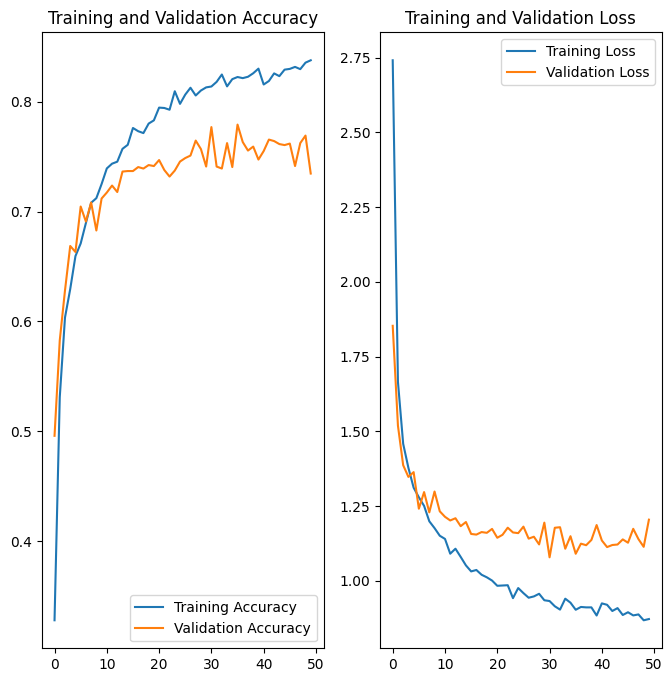

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
#menyimpan model

from tensorflow.keras.models import load_model 
model.save('model_v1.h5')